In [1]:
using Pkg
Pkg.activate("./")
using Suppressor
@suppress begin
    using Oceananigans, CairoMakie, TimestepperTestCases, Statistics
    using LaTeXStrings, Statistics
end

  Activating project at `~/development/TimestepperTestCases.jl`


In [28]:
al = @suppress TimestepperTestCases.load_internal_tide("internal_tide/", "QuasiAdamsBashforth2", "split_free_surface")
ri = @suppress TimestepperTestCases.load_internal_tide("internal_tide/", "SplitRungeKutta3",     "implicit_free_surface")
rl = @suppress TimestepperTestCases.load_internal_tide("internal_tide/", "SplitRungeKutta3",     "split_free_surface")
r3 = @suppress TimestepperTestCases.load_internal_tide("internal_tide/", "SplitRungeKutta3",     "split_free_surface_UpwindBiased")

Dict{Any, Any} with 23 entries:
  :b    => 256×1×128×961 FieldTimeSeries{OnDisk} located at (Center, Center, Ce…
  :Gbx  => 256×1×128×961 FieldTimeSeries{InMemory} located at (Face, Center, Ce…
  :κb   => 256×1×128×961 FieldTimeSeries{InMemory} located at (Center, Center, …
  :abz  => [0.0, -1.6769e-15, -4.62787e-15, -6.27407e-15, -4.33941e-15, -2.0260…
  :RPE  => Any[9.95837e5, 1.00357e6, 1.00367e6, 1.00367e6, 1.00367e6, 1.00367e6…
  :w    => 256×1×129×961 FieldTimeSeries{OnDisk} located at (Center, Center, Fa…
  :Abx  => 256×1×128×961 FieldTimeSeries{InMemory} located at (Face, Center, Ce…
  :gbz  => [9.84867e-9, 9.84879e-9, 9.84916e-9, 9.84976e-9, 9.85046e-9, 9.85102…
  :η2   => [0.0, 0.00138164, 7.90937e-5, 0.000587472, 0.000177937, 0.000694042,…
  :abx  => [0.0, -4.02638e-15, -7.82587e-15, -1.1243e-14, -1.07056e-14, -7.3252…
  :η    => 256×1×1×961 FieldTimeSeries{OnDisk} located at (Center, Center, Face…
  :VCCC => 256×1×128×961 FieldTimeSeries{InMemory} located at (Center, Center

In [34]:
using LaTeXStrings

ticks(vec) = (vec, latexstring.(string.(vec)))

function running_mean(v, points)
    n  = length(v)
    rm = zeros(length(v) - 2points+1)
    for i in points+1:n-points
        rm[i-points] = mean(v[i - points:i+points])
    end
    return rm[1:end-1]
end

running_mean (generic function with 1 method)

In [35]:
url = Field(rl[:u][end] / rl[:VFCC][end] - mean(rl[:u][end] / rl[:VFCC][end]))
uri = Field(ri[:u][end] / ri[:VFCC][end] - mean(ri[:u][end] / ri[:VFCC][end]))
ual = Field(al[:u][end] / al[:VFCC][end] - mean(al[:u][end] / al[:VFCC][end]))
ur3 = Field(r3[:u][end] / r3[:VFCC][end] - mean(r3[:u][end] / r3[:VFCC][end]))

ηrl = rl[:η][end]
ηr3 = r3[:η][end]
ηri = ri[:η][end]
ηal = al[:η][end]

Nrl = Field(∂z(rl[:b][end] / rl[:VCCC][end]))
Nr3 = Field(∂z(r3[:b][end] / r3[:VCCC][end]))
Nri = Field(∂z(ri[:b][end] / ri[:VCCC][end]))
Nal = Field(∂z(al[:b][end] / al[:VCCC][end]))

bu = Float64.(interior(rl[:u][end]) .== 0)
bu[bu .== 1] .= NaN

bw = Float64.(interior(Nrl) .== 0)
bw[bw .== 1] .= NaN
nothing

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/UjJJY/src/scenes.jl:238


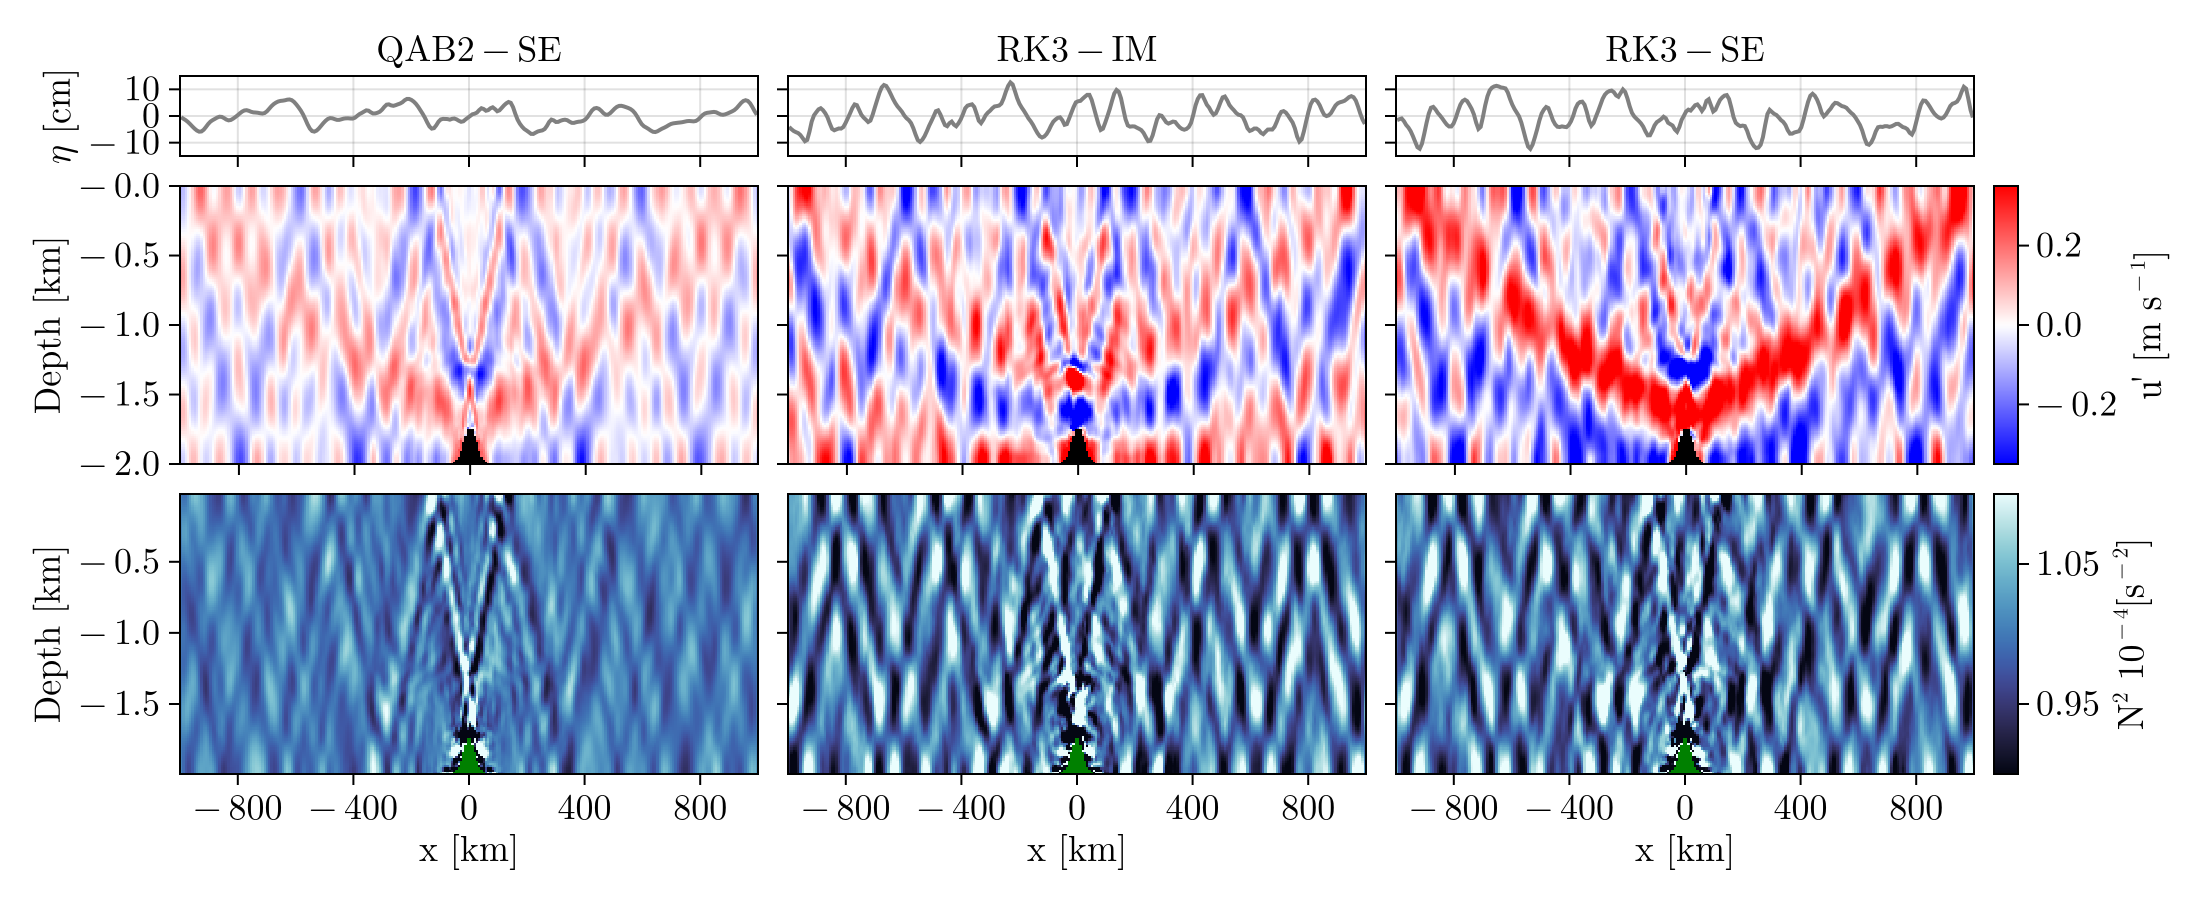

CairoMakie.Screen{PDF}


In [101]:
xu, yu, zu = nodes(rl[:u])
xw, yw, zw = nodes(rl[:w])
xη, yη, zη = nodes(rl[:η])

xticks  = ([-800, -400, 0, 400, 800] .* 1000, latexstring.(string.([-800, -400, 0, 400, 800])))
xnticks = ([-800, -400, 0, 400, 800] .* 1000, ["", "", "", "", ""])

yticks = ([-2, -1.5, -1, -0.5, -0] .* 1000, latexstring.(string.([-2.0, -1.5, -1.0, -0.5, -0.0])))
ynticks = ([-2, -1.5, -1, -0.5, -0] .* 1000, ["", "", "", "", ""])

yeticks =  ([-1, -0, 1] .* 1e-1, latexstring.(string.([-10, 0, 10])))
yenticks = ([-1, -0, 1] .* 1e-1, ["", "", ""])

fig  = Figure(resolution = (1100, 450), fontsize = 18)
ga   = GridLayout(fig[1, 1])
ax01 = Axis(ga[1, 1],    title = L"\text{QAB2-SE}", xlabel ="", ylabel = L"\eta \text{ [cm]}", xticks=xnticks, yticks=yeticks)
ax02 = Axis(ga[1, 2],    title = L"\text{RK3-IM}", xlabel ="", ylabel = "", xticks=xnticks,   yticks=yenticks)
ax03 = Axis(ga[1, 3],    title = L"\text{RK3-SE}", xlabel ="", ylabel = "", xticks=xnticks,   yticks=yenticks)
ax11 = Axis(ga[2:4, 1],  xlabel ="", ylabel = L"\text{Depth [km]}", xticks=xnticks, yticks=yticks)
ax12 = Axis(ga[2:4, 2],  xlabel ="", ylabel = "",                   xticks=xnticks, yticks=ynticks)
ax13 = Axis(ga[2:4, 3],  xlabel ="", ylabel = "",                   xticks=xnticks, yticks=ynticks)
ax21 = Axis(ga[5:7, 1], xlabel =L"\text{x [km]}", ylabel = L"\text{Depth [km]}", xticks=xticks, yticks=yticks)
ax22 = Axis(ga[5:7, 2], xlabel =L"\text{x [km]}", ylabel ="",                    xticks=xticks, yticks=ynticks)
ax23 = Axis(ga[5:7, 3], xlabel =L"\text{x [km]}", ylabel ="",                    xticks=xticks, yticks=ynticks)

lines!(ax01, xη, interior(ηal, :, 1, 1), color = :grey, linewidth = 2)
lines!(ax02, xη, interior(ηri, :, 1, 1), color = :grey, linewidth = 2)
lines!(ax03, xη, interior(ηrl, :, 1, 1), color = :grey, linewidth = 2)

xlims!(ax01, -1e6, 1e6)
xlims!(ax02, -1e6, 1e6)
xlims!(ax03, -1e6, 1e6)
ylims!(ax01, -0.15, 0.15)
ylims!(ax02, -0.15, 0.15)
ylims!(ax03, -0.15, 0.15)

hm = heatmap!(ax11, xu, zu, interior(ual, :, 1, :) .+ bu[:, 1, :]; colormap=:bwr, colorrange = (-0.35, 0.35), nan_color=:black)
hm = heatmap!(ax12, xu, zu, interior(uri, :, 1, :) .+ bu[:, 1, :]; colormap=:bwr, colorrange = (-0.35, 0.35), nan_color=:black)
hm = heatmap!(ax13, xu, zu, interior(url, :, 1, :) .+ bu[:, 1, :]; colormap=:bwr, colorrange = (-0.35, 0.35), nan_color=:black)
Colorbar(ga[2:4, 4], hm, label = L"\text{u' [m s}^{-1}\text{]}", ticks = ([-0.2, 0.0, 0.2], latexstring.(string.([-0.2, 0.0, 0.2]))))
hm = heatmap!(ax21, xw, zw[2:127], interior(Nal, :, 1, 2:127) .+ bw[:, 1, 2:127]; colormap=:ice, colorrange = (0.00009, 0.00011), nan_color = :green)
hm = heatmap!(ax22, xw, zw[2:127], interior(Nri, :, 1, 2:127) .+ bw[:, 1, 2:127]; colormap=:ice, colorrange = (0.00009, 0.00011), nan_color = :green)
hm = heatmap!(ax23, xw, zw[2:127], interior(Nrl, :, 1, 2:127) .+ bw[:, 1, 2:127]; colormap=:ice, colorrange = (0.00009, 0.00011), nan_color = :green)
Colorbar(ga[5:7, 4], hm, label = L"\text{N}^{2}\text{ } 10^{-4}\text{[s}^{-2}\text{]}", ticks = ([0.95, 0.00, 1.05] .* 1e-4, latexstring.(string.([0.95, 0.00, 1.05]))))

colgap!(ga, 10)
rowgap!(ga, 10)
display(fig)

path = "/Users/simonesilvestri/Dropbox (MIT)/Apps/Overleaf/timestepper/"

CairoMakie.save(path * "figure-internal-tide.pdf", fig)

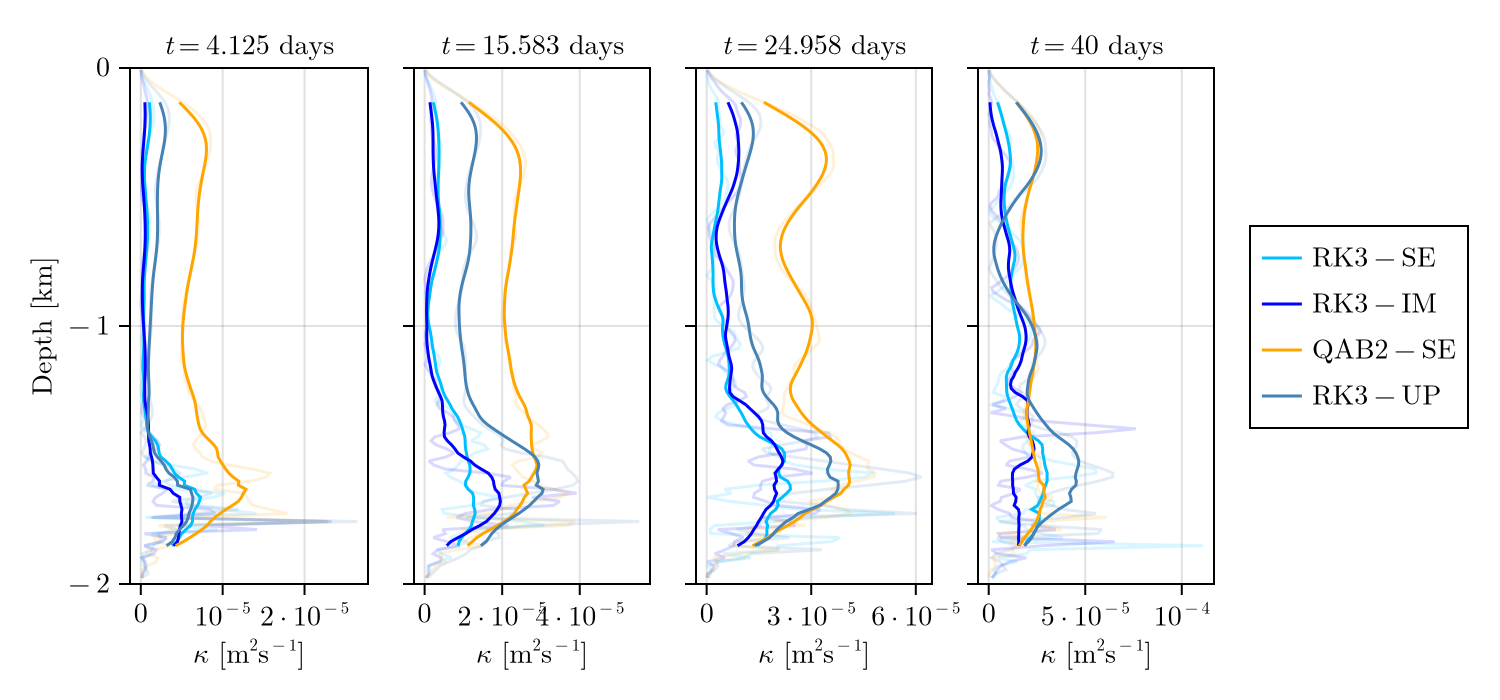

CairoMakie.Screen{PDF}


In [126]:
c1 = :deepskyblue 
c2 = :blue
c3 = :orange1 
c4 = :steelblue

mvv = 8

zC  = ri[:Abx].grid.z.cᵃᵃᶜ[2:128] ./ 1000
fig = Figure(size = (750, 350))

xticks1 = ([0, 1e-5, 2e-5], [L"0", L"10^{-5}", L"2 \cdot 10^{-5}"])
xticks2 = ([0, 3e-5, 6e-5, 9e-5], [L"0", L"3\cdot 10^{-5}", L"6 \cdot 10^{-5}", L"9 \cdot 10^{-5}"])
xticks3 = ([0, 2e-5, 4e-5, 6e-5], [L"0", L"2\cdot 10^{-5}", L"4 \cdot 10^{-5}", L"6 \cdot 10^{-5}"])
xticks4 = ([0, 5e-5, 1e-4, 1.5e-4], [L"0", L"5\cdot 10^{-5}", L"10^{-4}", L"1.5 \cdot 10^{-4}"])

ϵ   = 0
it  = 100
κrl = abs.(interior(Field(mean(rl[:Abz][it] + rl[:Abx][it], dims=1) / (mean(rl[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
κr3 = abs.(interior(Field(mean(r3[:Abz][it] + r3[:Abx][it], dims=1) / (mean(r3[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
κri = abs.(interior(Field(mean(ri[:Abz][it] + ri[:Abx][it], dims=1) / (mean(r3[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
κal = abs.(interior(Field(mean(al[:Abz][it] + al[:Abx][it], dims=1) / (mean(al[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
ax = Axis(fig[1, 1], 
          xlabel=L"\kappa \text{ [m}^2\text{s}^{-1}\text{]}", 
          xticks=xticks1, 
          title=L"t = \text{%$(Oceananigans.Utils.prettytime(rl[:Abz].times[it]))}",
          yticks=ticks([-2, -1, 0]), 
          ylabel=L"\text{Depth [km]}")
lines!(ax, κrl, zC, color = (c1, 0.15))
lines!(ax, κri, zC, color = (c2, 0.15))
lines!(ax, κal, zC, color = (c3, 0.15))
lines!(ax, κr3, zC, color = (c4, 0.15))
lines!(ax, running_mean(κrl, mvv), running_mean(zC, mvv), color = c1, linewidth=1.5, label=L"\text{RK3-SE}")
lines!(ax, running_mean(κri, mvv), running_mean(zC, mvv), color = c2, linewidth=1.5, label=L"\text{RK3-IM}")
lines!(ax, running_mean(κal, mvv), running_mean(zC, mvv), color = c3, linewidth=1.5, label=L"\text{QAB2-SE}")
lines!(ax, running_mean(κr3, mvv), running_mean(zC, mvv), color = c4, linewidth=1.5, label=L"\text{RK3-UP}")
ylims!(ax, -2, 0)
ax2 = ax

it  = 375
κrl = abs.(interior(Field(mean(rl[:Abz][it] + rl[:Abx][it], dims=1) / (mean(rl[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
κr3 = abs.(interior(Field(mean(r3[:Abz][it] + r3[:Abx][it], dims=1) / (mean(r3[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
κri = abs.(interior(Field(mean(ri[:Abz][it] + ri[:Abx][it], dims=1) / (mean(r3[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
κal = abs.(interior(Field(mean(al[:Abz][it] + al[:Abx][it], dims=1) / (mean(al[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
ax  = Axis(fig[1, 2], 
           xlabel=L"\kappa \text{ [m}^2\text{s}^{-1}\text{]}", 
           title=L"t = \text{%$(Oceananigans.Utils.prettytime(rl[:Abz].times[it]))}",
           xticks=xticks3, 
           yticks=([-2, -1, 0], ["", "", ""]), 
           ylabel="")
lines!(ax, κrl, zC, color = (c1, 0.15))
lines!(ax, κri, zC, color = (c2, 0.15))
lines!(ax, κal, zC, color = (c3, 0.15))
lines!(ax, κr3, zC, color = (c4, 0.15))
lines!(ax, running_mean(κrl, mvv), running_mean(zC, mvv), color = c1, linewidth=1.5, label=L"\text{\textbf{RK3-SE}}")
lines!(ax, running_mean(κri, mvv), running_mean(zC, mvv), color = c2, linewidth=1.5, label=L"\text{\textbf{RK3-IM}}")
lines!(ax, running_mean(κal, mvv), running_mean(zC, mvv), color = c3, linewidth=1.5, label=L"\text{\textbf{QAB2-SE}}")
lines!(ax, running_mean(κr3, mvv), running_mean(zC, mvv), color = c4, linewidth=1.5, label=L"\text{RK3-SE}")
ylims!(ax, -2, 0)

it  = 600
κrl = abs.(interior(Field(mean(rl[:Abz][it] + rl[:Abx][it], dims=1) / (mean(rl[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
κr3 = abs.(interior(Field(mean(r3[:Abz][it] + r3[:Abx][it], dims=1) / (mean(r3[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
κri = abs.(interior(Field(mean(ri[:Abz][it] + ri[:Abx][it], dims=1) / (mean(r3[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
κal = abs.(interior(Field(mean(al[:Abz][it] + al[:Abx][it], dims=1) / (mean(al[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
ax  = Axis(fig[1, 3], 
           xlabel=L"\kappa \text{ [m}^2\text{s}^{-1}\text{]}", 
           title=L"t = \text{%$(Oceananigans.Utils.prettytime(rl[:Abz].times[it]))}",
           xticks=xticks2, 
           yticks=([-2, -1, 0], ["", "", ""]), 
           ylabel="")
lines!(ax, κrl, zC, color = (c1, 0.15))
lines!(ax, κri, zC, color = (c2, 0.15))
lines!(ax, κal, zC, color = (c3, 0.15))
lines!(ax, κr3, zC, color = (c4, 0.15))
lines!(ax, running_mean(κrl, mvv), running_mean(zC, mvv), color = c1, linewidth=1.5)
lines!(ax, running_mean(κri, mvv), running_mean(zC, mvv), color = c2, linewidth=1.5)
lines!(ax, running_mean(κal, mvv), running_mean(zC, mvv), color = c3, linewidth=1.5)
lines!(ax, running_mean(κr3, mvv), running_mean(zC, mvv), color = c4, linewidth=1.5, label=L"\text{RK3-SE}")
ylims!(ax, -2, 0)

it  = 961
κrl = abs.(interior(Field(mean(rl[:Abz][it] + rl[:Abx][it], dims=1) / (mean(rl[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
κr3 = abs.(interior(Field(mean(r3[:Abz][it] + r3[:Abx][it], dims=1) / (mean(r3[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
κri = abs.(interior(Field(mean(ri[:Abz][it] + ri[:Abx][it], dims=1) / (mean(r3[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
κal = abs.(interior(Field(mean(al[:Abz][it] + al[:Abx][it], dims=1) / (mean(al[:Gbz][it], dims=1) + ϵ) / 2), 1, 1, 2:128))
ax = Axis(fig[1, 4], 
          title=L"t = \text{%$(Oceananigans.Utils.prettytime(rl[:Abz].times[it]))}",
          xlabel=L"\kappa \text{ [m}^2\text{s}^{-1}\text{]}", 
          xticks=xticks4, 
          yticks=([-2, -1, 0], ["", "", ""]), 
          ylabel="")
lines!(ax, κrl, zC, color = (c1, 0.15))
lines!(ax, κri, zC, color = (c2, 0.15))
lines!(ax, κal, zC, color = (c3, 0.15))
lines!(ax, κr3, zC, color = (c4, 0.15))
lines!(ax, running_mean(κrl, mvv), running_mean(zC, mvv), color = c1, linewidth=1.5)
lines!(ax, running_mean(κri, mvv), running_mean(zC, mvv), color = c2, linewidth=1.5)
lines!(ax, running_mean(κal, mvv), running_mean(zC, mvv), color = c3, linewidth=1.5)
lines!(ax, running_mean(κr3, mvv), running_mean(zC, mvv), color = c4, linewidth=1.5, label=L"\text{RK3-SE}")
ylims!(ax, -2, 0)

Legend(fig[1, 5], ax2)

display(current_figure())
CairoMakie.save(path * "diffusivity-internal-tide.pdf", fig)

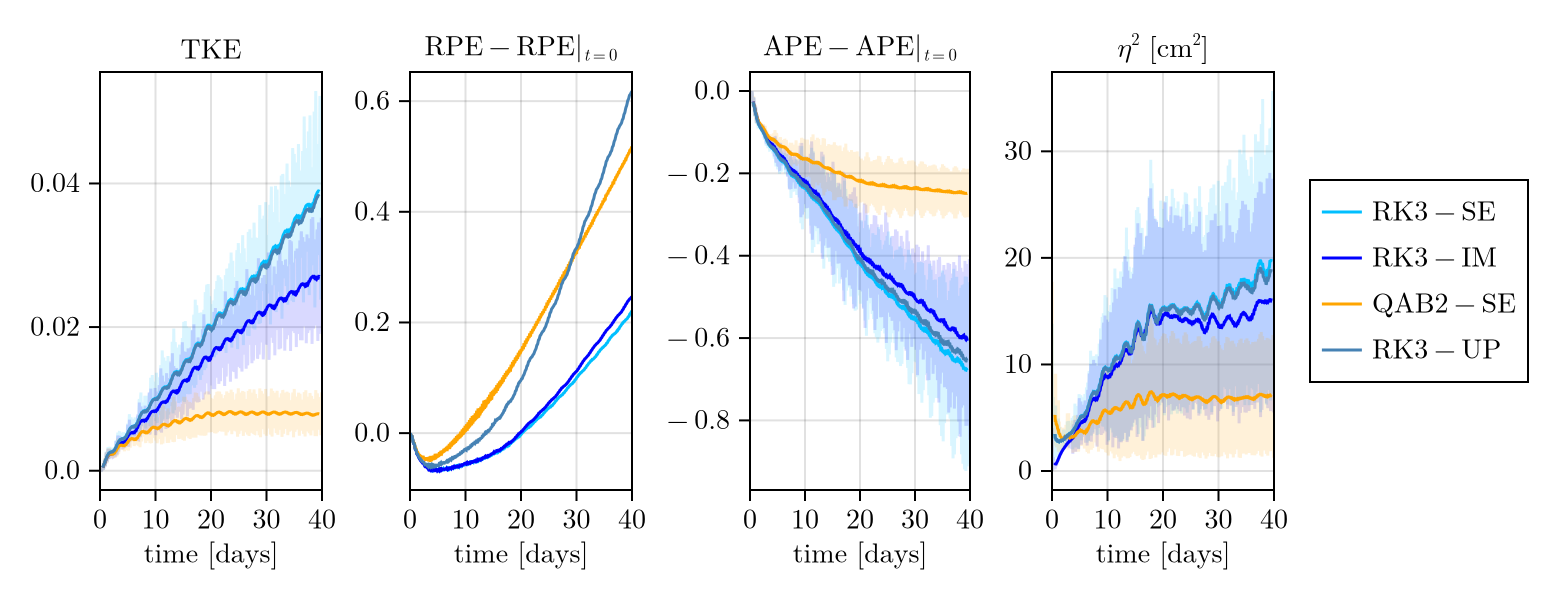

CairoMakie.Screen{PDF}


In [122]:
fig = Figure(size = (780, 300))


ax1 = Axis(fig[1, 1], title=L"\text{TKE}", xlabel=L"\text{time [days]}", xticks=ticks([0, 10, 20, 30, 40]), yticks=ticks([0.00, 0.02, 0.04]))
ax2 = Axis(fig[1, 2], title=L"\text{RPE}-\text{RPE}|_{t=0}", xlabel=L"\text{time [days]}", xticks=ticks([0, 10, 20, 30, 40]), yticks=ticks([0.00, 0.2, 0.4, 0.6]))
ax3 = Axis(fig[1, 3], title=L"\text{APE}-\text{APE}|_{t=0}", xlabel=L"\text{time [days]}", xticks=ticks([0, 10, 20, 30, 40]), yticks=ticks([0.00, -0.2, -0.4, -0.6, -0.8]))
ax4 = Axis(fig[1, 4], title=L"\eta^2 \text{ [cm}^2\text{]}", xlabel=L"\text{time [days]}", xticks=ticks([0, 10, 20, 30, 40]), yticks=ticks([0, 10, 20, 30, 40]))
times = rl[:Abx].times ./ 86400

lines!(ax1, times, rl[:KE] .- rl[:MKE], color = (c1, 0.15))
lines!(ax1, times, ri[:KE] .- ri[:MKE], color = (c2, 0.15))
lines!(ax1, times, al[:KE] .- al[:MKE], color = (c3, 0.15))

lines!(ax1, running_mean(times, 12), running_mean(rl[:KE] .- rl[:MKE], 12), color = c1)
lines!(ax1, running_mean(times, 12), running_mean(ri[:KE] .- ri[:MKE], 12), color = c2)
lines!(ax1, running_mean(times, 12), running_mean(al[:KE] .- al[:MKE], 12), color = c3)
lines!(ax1, running_mean(times, 12), running_mean(r3[:KE] .- r3[:MKE], 12), color = c4)

lines!(ax2, times[3:end], (ri[:RPE][3:end] .- ri[:RPE][3]), color = c1)
lines!(ax2, times[3:end], (rl[:RPE][3:end] .- rl[:RPE][3]), color = c2)
lines!(ax2, times[3:end], (al[:RPE][3:end] .- al[:RPE][3]), color = c3)
lines!(ax2, times[3:end], (r3[:RPE][3:end] .- r3[:RPE][3]), color = c4)

lines!(ax3, times[3:end], - (rl[:APE][3:end] .- rl[:APE][3]), color = (c1, 0.15))
lines!(ax3, times[3:end], - (ri[:APE][3:end] .- ri[:APE][3]), color = (c2, 0.15))
lines!(ax3, times[3:end], - (al[:APE][3:end] .- al[:APE][3]), color = (c3, 0.15))

lines!(ax3, running_mean(times[3:end], 12), - running_mean(rl[:APE][3:end] .- rl[:APE][3], 12), color = c1, label=L"\text{RK3-SE}")
lines!(ax3, running_mean(times[3:end], 12), - running_mean(ri[:APE][3:end] .- ri[:APE][3], 12), color = c2, label=L"\text{RK3-IM}")
lines!(ax3, running_mean(times[3:end], 12), - running_mean(al[:APE][3:end] .- al[:APE][3], 12), color = c3, label=L"\text{QAB2-SE}")
lines!(ax3, running_mean(times[3:end], 12), - running_mean(r3[:APE][3:end] .- r3[:APE][3], 12), color = c4, label=L"\text{RK3-UP}")

lines!(ax4, times, rl[:η2] .* 1e4, color = (c1, 0.15))
lines!(ax4, times, ri[:η2] .* 1e4, color = (c2, 0.15))
lines!(ax4, times, al[:η2] .* 1e4, color = (c3, 0.15))

lines!(ax4, running_mean(times, 12), running_mean(rl[:η2] .* 1e4, 12), color = c1, label=L"\text{RK3-SE}")
lines!(ax4, running_mean(times, 12), running_mean(ri[:η2] .* 1e4, 12), color = c2, label=L"\text{RK3-IM}")
lines!(ax4, running_mean(times, 12), running_mean(al[:η2] .* 1e4, 12), color = c3, label=L"\text{QAB2-SE}")
lines!(ax4, running_mean(times, 12), running_mean(r3[:η2] .* 1e4, 12), color = c4, label=L"\text{RK3-UP}")

xlims!(ax1, 0, 40)
xlims!(ax2, 0, 40)
xlims!(ax3, 0, 40)
xlims!(ax4, 0, 40)

Legend(fig[1, 5], ax3)
display(fig)

CairoMakie.save(path * "energetics-internal-tide.pdf", fig)

### 